<a href="https://colab.research.google.com/github/fedhere/MLTSA_FBianco/blob/master/CodeExamples/whitening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import json
import os
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
!pip install kaggle

In [3]:
import pandas as pd
import pylab as pl
import json
import os
%pylab inline

pl.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [4]:
from google.colab import drive

drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
cd gdrive/My\ Drive/


/content/gdrive/My Drive


In [6]:
!ls kaggle.json

kaggle.json


In [0]:
!chmod 600 kaggle.json


In [0]:

envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [9]:
!kaggle competitions download -c higgs-boson


 83% 14.0M/16.9M [00:12<00:17, 175kB/s]
100% 16.9M/16.9M [00:12<00:00, 1.42MB/s]
 95% 33.0M/34.8M [00:01<00:00, 1.92MB/s]
100% 34.8M/34.8M [00:01<00:00, 18.5MB/s]
 39% 1.00M/2.58M [00:01<00:01, 987kB/s]
100% 2.58M/2.58M [00:01<00:00, 2.41MB/s]
100% 3.15k/3.15k [00:00<00:00, 3.99kB/s]



In [10]:
!unzip test.zip 


Archive:  test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


In [0]:
data = pd.read_csv("test.csv")


In [12]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,1.536,-1.404,-999.000,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,1.777,-1.204,-999.000,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,1.096,-1.408,-999.000,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,0.819,-1.382,-999.000,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,1.713,-0.913,0.004,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [13]:
data.tail()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
549995,899995,309.530,28.185,170.795,99.349,-999.0,-999.0,-999.0,3.061,2.367,212.640,0.708,1.346,-999.0,67.429,0.657,-2.560,47.761,-1.372,1.431,61.754,1.956,177.103,1,97.451,-1.759,-0.733,-999.0,-999.0,-999.0,97.451
549996,899996,105.653,5.096,77.256,33.040,-999.0,-999.0,-999.0,2.693,33.040,62.279,0.948,0.551,-999.0,31.964,0.162,-2.624,30.315,-1.404,-0.432,12.670,-0.172,130.730,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,-0.000
549997,899997,-999.000,69.470,51.766,1.189,-999.0,-999.0,-999.0,1.615,1.189,72.350,0.752,-1.398,-999.0,41.290,0.559,-2.156,31.060,0.578,2.512,49.505,0.336,71.646,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,-0.000
549998,899998,107.254,13.500,79.833,50.801,-999.0,-999.0,-999.0,2.026,7.993,135.762,1.087,-0.288,-999.0,44.403,-0.504,1.710,48.260,-0.096,-0.274,7.741,-0.988,243.371,1,43.099,-0.352,-2.594,-999.0,-999.0,-999.0,43.099
549999,899999,107.961,85.200,75.670,42.009,-999.0,-999.0,-999.0,2.877,7.699,130.114,2.175,1.401,-999.0,25.473,-1.098,2.681,55.410,-0.731,-0.173,41.663,2.007,183.695,1,49.231,-0.234,-1.973,-999.0,-999.0,-999.0,49.231


In [14]:
data.describe()


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000,550000.000000
mean,624999.500000,-48.950144,49.261093,81.123904,57.824801,-707.448878,-599.705905,-708.391425,2.374076,18.988277,158.659749,1.439415,-0.126942,-708.015756,38.696831,-0.011861,-0.015815,46.714062,-0.018781,0.051797,41.627231,-0.008214,209.933695,0.980171,-348.946684,-399.883839,-399.896234,-691.309277,-708.150605,-708.153058,73.248856
std,158771.468364,406.233686,35.425422,40.435560,63.291314,454.928791,659.129589,453.461222,0.779895,21.767376,116.237589,0.845026,1.194503,454.043330,22.421603,1.213344,1.816023,22.174519,1.264147,1.814055,32.324457,1.812777,126.910079,0.979271,533.155176,489.467786,489.457747,480.435230,453.834190,453.830095,98.467134
min,350000.000000,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.000000,46.103000,0.055000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.508000,-3.142000,0.051000,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000
25%,487499.750000,78.167750,19.313000,59.422000,14.192000,-999.000000,-999.000000,-999.000000,1.815000,2.838000,77.471000,0.886000,-1.371000,-999.000000,24.582000,-0.926000,-1.588000,32.378000,-1.011000,-1.508000,21.374000,-1.574000,122.984750,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,624999.500000,105.076000,46.455500,73.747000,38.469500,-999.000000,-999.000000,-999.000000,2.492000,12.390000,120.701500,1.282000,-0.356000,-999.000000,31.770000,-0.021000,-0.042000,40.561500,-0.038000,0.097000,34.758000,-0.017000,179.949000,1.000000,38.970000,-1.862000,-2.111000,-999.000000,-999.000000,-999.000000,40.503500
75%,762499.250000,130.769000,73.646000,92.173000,79.234250,0.503000,84.266250,-4.538000,2.962000,27.649000,201.018000,1.779000,1.230000,0.000000,44.883000,0.899000,1.557000,53.387000,0.956000,1.617000,51.922000,1.558000,263.917250,2.000000,75.499000,0.431000,0.484000,33.832000,-2.429000,-2.260000,110.507000
max,899999.000000,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.294000,5.751000,759.363000,2079.162000,32.228000,1.414000,1.000000,627.023000,2.500000,3.142000,701.328000,2.506000,3.142000,1254.363000,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


Consider 2 features: 



In [16]:
!unzip coronavirusdataset.zip

Archive:  coronavirusdataset.zip
  inflating: Case.csv                
  inflating: PatientInfo.csv         
  inflating: PatientRoute.csv        
  inflating: Region.csv              
  inflating: SearchTrend.csv         
  inflating: SeoulFloating.csv       
  inflating: Time.csv                
  inflating: TimeAge.csv             
  inflating: TimeGender.csv          
  inflating: TimeProvince.csv        
  inflating: Weather.csv             


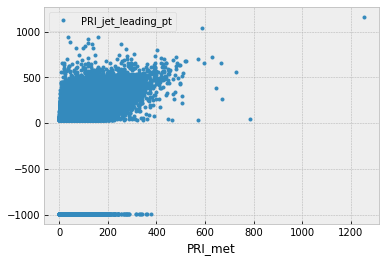

In [17]:
data.plot("PRI_met",	"PRI_jet_leading_pt", style='.')

remove outliers 

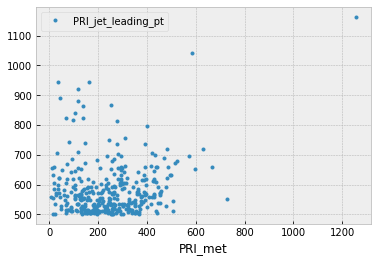

In [18]:
data = data[data["PRI_jet_leading_pt"] > 500]
data.plot("PRI_met",	"PRI_jet_leading_pt", style='.')

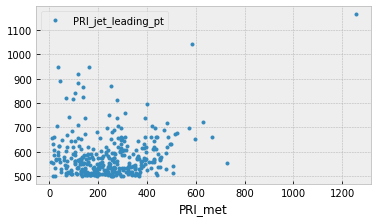

In [22]:
data = data[data["PRI_jet_leading_pt"] > 500]
ax = pl.figure().add_subplot(111)
ax.set_aspect('equal')
data.plot("PRI_met",	"PRI_jet_leading_pt", 
          style='.', ax=ax)


In [23]:

from sklearn import preprocessing
X = data[["PRI_met",	"PRI_jet_leading_pt"]].values
X_scaled = preprocessing.scale(X)


print("scaled training data feature mean and standard deviations: ", 
      X_scaled.mean(axis=0), X_scaled.std(axis=0))


scaled training data feature mean and standard deviations:  [ 1.70610544e-16 -3.31185173e-16] [1. 1.]


Text(0, 0.5, 'scaled PRI_jet_leading_pt')

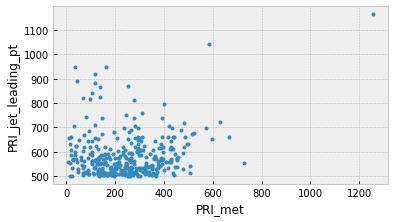

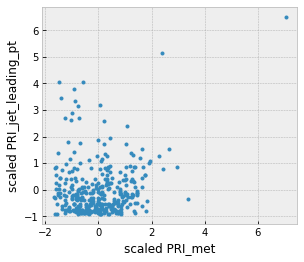

In [29]:
ax = pl.figure().add_subplot(111)
ax.set_aspect('equal')
ax.plot(X.T[0],	X.T[1], 
          '.')
pl.xlabel("PRI_met")
pl.ylabel("PRI_jet_leading_pt")

ax = pl.figure().add_subplot(111)
ax.set_aspect('equal')
ax.plot(X_scaled.T[0],	X_scaled.T[1], 
          '.')
pl.xlabel("scaled PRI_met")
pl.ylabel("scaled PRI_jet_leading_pt")



# summary: you can think about scaling as squaring up the feature space 